In [1]:
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import numpy as np
import sys
import mne

sys.path.append('../utils')
from ERP_utils import *
from update_sub_lists import*

In [27]:
def wavelet_freqs(fs, n_freqs):
    
    nyquist_freq = fs / 2
    freqs = np.arange(1, n_freqs + 1)

    # Calculate the frequencies corresponding to each index
    frequencies = nyquist_freq * (2 ** (-(n_freqs - freqs) / 24)) #maybe change the 24 for future applications
    return frequencies



def find_closest_indices(array, values):
    """
    Find indices of the closest elements in a 1D array to given values.
    
    Parameters:
    - array (np.ndarray): A 1D numpy array to search.
    - values (list): A list of values to find closest elements for.
    
    Returns:
    - list: A list of indices in the array corresponding to the closest elements.
    """
    indices = []
    for value in values:
        # Get the index of the closest value
        closest_index = (np.abs(array - value)).argmin()
        indices.append(closest_index)
    return indices

def freq_index(frequencies_array, freqs):
    frequencies_array
    freq_idx = find_closest_indices(frequencies_array, freqs)
    return freq_idx


In [129]:
data_group1 = loadmat('y_listen_mus_pre.mat')['y_listen_mus_pre']
data_group2 = loadmat('y_motor_mus_post.mat')['y_motor_mus_post']

#parameters
fs = 128
n_freqs = 128



In [170]:

#loading items for plotting
pos_info = load_ep_info()
frequencies = wavelet_freqs(fs, n_freqs)
channel_toplot = ch_index(['Cz']) #for plots over time
freq_toplot = freq_index(frequencies, [4]) #plot 4Hz

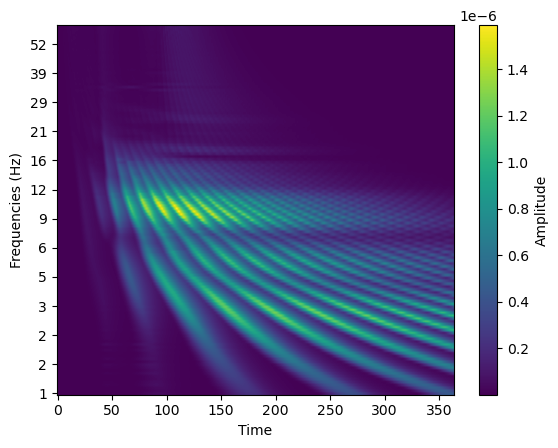

In [ ]:
#sanity check
plt.imshow(data_group[1, 1, :, :].T, aspect='auto')
plt.gca().invert_yaxis()  # Invert the y-axis
plt.ylabel('Frequencies (Hz)')
plt.xlabel('Time')
plt.colorbar(label='Amplitude')  # Add a colorbar if needed

# Create a new array for every 10th tick
tick_locations = np.linspace(0, data_group.shape[3], 128)
tick_indices = np.arange(0, len(tick_locations), 10)  # Indices for every 10th tick
selected_ticks = tick_locations[tick_indices]  # Get corresponding tick locations
selected_labels = [int(frequencies[i]) for i in tick_indices]  # Get labels for every 10th tick

plt.yticks(selected_ticks, labels=selected_labels)
plt.show()

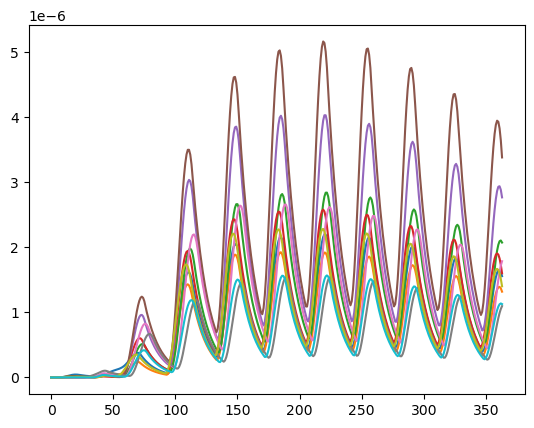

In [ ]:
#sanity check
for subject in range(data_group.shape[0]):
    plt.plot(np.squeeze(data_group[subject, channel_toplot, :, freq_toplot]))

In [103]:
spect_mean_1 = np.mean(data_group1, axis = 0)
spect_mean_2 = np.mean(data_group2, axis = 0)

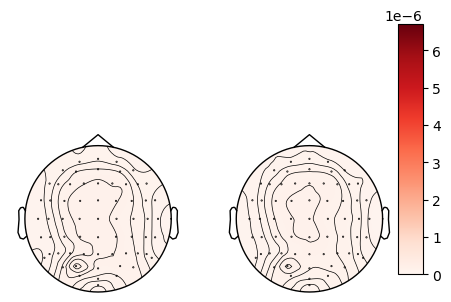

In [157]:
fig, ax = plt.subplots(1, 2, figsize=(5, 5))  # Set the figure size here
topo_test = np.squeeze(spect_mean[:, 290, freq_toplot])
topo_test2 = np.squeeze(spect_mean[:, 300, freq_toplot])


vmax = np.max(data_group)
vmin = np.min(data_group)
im1, _ = mne.viz.plot_topomap(topo_test, pos=pos_info, axes=ax[0], vlim = (vmin, vmax), show = False)  # Pass the axes to the function
im2, _ = mne.viz.plot_topomap(topo_test2, pos=pos_info, axes=ax[1], vlim = (vmin, vmax), show = False)  # Pass the axes to the function


cbar_ax = fig.add_axes([0.9,0.4,0.05,0.5])
clb = fig.colorbar(im1, cax=cbar_ax)
#clb.ax.set_title(unit_label,fontsize=fontsize) # title on top of colorbar

plt.show()

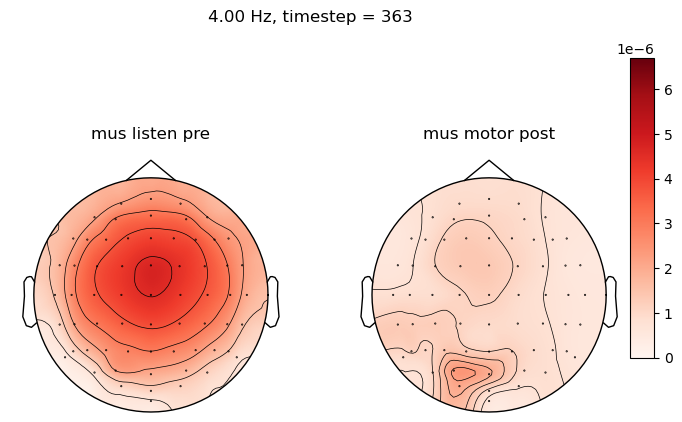

In [171]:
timepoints = np.arange(0, 364)  
vmax = np.max([spect_mean_1[:, :, freq_toplot], spect_mean_2[:,:,freq_toplot]])
vmin = np.min([spect_mean_1[:, :, freq_toplot], spect_mean_2[:,:,freq_toplot]])

fig, axes = plt.subplots(1, 2, figsize=(8, 6))
cbar_ax = fig.add_axes([0.9,0.4,0.03,0.5])
clb = fig.colorbar(im2, cax=cbar_ax)

# Function to update the topomap for each frame
def update(frame):
    # Clear the axes for the new frame

    axes[0].clear()
    axes[1].clear()

    # Set titles for both subplots
    axes[0].set_title(f'mus listen pre')
    axes[1].set_title(f'mus motor post')

    # Plot topomap on the first subplot
    im1, cn1 = mne.viz.plot_topomap(np.squeeze(spect_mean_1[:, frame, freq_toplot]), 
                                    pos=pos_info, 
                                    size=1, 
                                    axes=axes[0], 
                                    vlim=(vmin, vmax), 
                                    show=False)
    
    # Plot the same topomap on the second subplot
    im2, cn2 = mne.viz.plot_topomap(np.squeeze(spect_mean_2[:, frame, freq_toplot]), 
                                    pos=pos_info, 
                                    size=1, 
                                    axes=axes[1], 
                                    vlim=(vmin, vmax), 
                                    show=False)

    
    freq_curr = int(frequencies[freq_toplot])
    fig.suptitle(f'{frequencies[freq_toplot][0]:.2f} Hz, timestep = {frame}')
    return im1, im2

ani = FuncAnimation(fig, update, frames=timepoints, blit=False, repeat=True)


ani.save(f'{frequencies[freq_toplot][0]:.2f}_Hz_mus.mp4', writer='ffmpeg', fps=10)

plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'clear'

Error in callback <function _draw_all_if_interactive at 0x118575080> (for post_execute):


AttributeError: 'numpy.ndarray' object has no attribute 'clear'

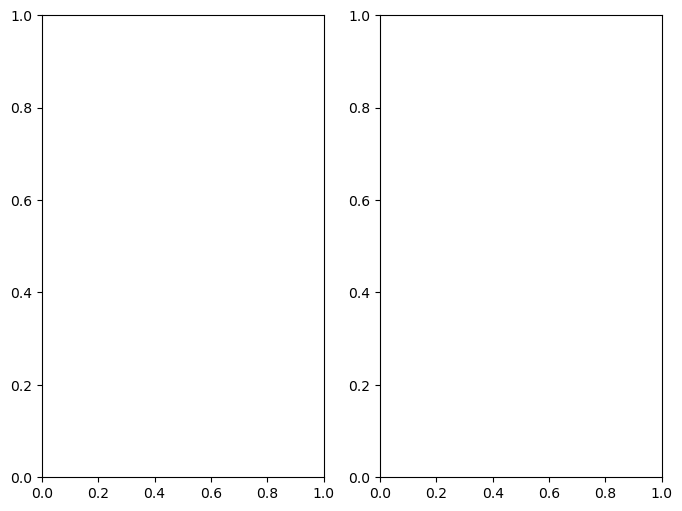

In [120]:
"""timepoints = np.arange(0, 10)
# Set up the figure and axes for the animation
fig, axes = plt.subplots(1,2,figsize=(8, 6))
#axes.set_title(f'Listening frequency')
vmax = np.max(spect_mean[:, :, freq_toplot])
vmin = np.min(spect_mean[:, :, freq_toplot])


# Function to update the topomap for each frame
def update(frame):
    axes.clear()  # Clear the axes for the new frame
    #axes.set_title(f'Power at 4Hz, listen task, timestep = {frame}')  # Update title
    im, cn = mne.viz.plot_topomap(np.squeeze(spect_mean_1[:, frame, freq_toplot]), 
                                   pos=pos_info, 
                                   size=1, 
                                   axes=axes, 
                                   vlim=(vmin, vmax), 
                                   show=False)  
    return im,

# Create animation
ani = FuncAnimation(fig, update, frames=timepoints, blit=False, repeat=True)

# Save the animation as an MP4 file
ani.save(f'tt.mp4', writer='ffmpeg', fps=10)

# Show the animation (optional)
plt.show()"""